<a href="https://colab.research.google.com/github/danc-data/SQL_Project_Jobs/blob/main/Python_Project_ZX_Lidars.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd
import numpy as np
from datetime import timedelta, datetime
import matplotlib.pyplot as plt

mast = pd.read_csv('/content/Mast.csv')
lidar = pd.read_csv('/content/Lidar.csv', header=1)

lidar = lidar.rename(columns={'Parameter': 'Date and Time (UTC)'})
lidar = lidar.drop(labels=0, axis=0)
lidar = lidar.reset_index().drop("index", axis = 1)

In [4]:
mast.head()

,Date and Time (UTC + 1),Direction at 60m,Mean Wind Speed at 60m (m/s),Std Dev Wind Speed at 60m (m/s),Direction at 120m,Mean Wind Speed at 120m (m/s),Std Dev Wind Speed at 120m (m/s)
0,04/02/2030 00:00,327.933,8.199,1.390,326.667,7.471,1.510
1,04/02/2030 00:10,324.977,7.238,1.020,323.322,6.600,1.111
2,04/02/2030 00:20,323.660,6.831,0.896,322.047,7.212,1.243
3,04/02/2030 00:30,320.928,7.017,0.796,318.449,8.228,1.554
4,04/02/2030 00:40,315.518,7.521,0.844,311.230,9.687,0.910


In [5]:
lidar.head()


,Date and Time (UTC),Error Code,Horizontal Wind Speed (m/s),Horizontal Wind Speed Max (m/s),Horizontal Wind Speed Min (m/s),Horizontal Wind Speed Std. Dev. (m/s),Wind Direction (deg),Error Code.1,Horizontal Wind Speed (m/s).1,Horizontal Wind Speed Max (m/s).1,Horizontal Wind Speed Min (m/s).1,Horizontal Wind Speed Std. Dev. (m/s).1,Wind Direction (deg).1
0,05/02/2030 00:00,0.0,6.025,6.721,4.699,0.626,319.4,0.0,6.004,6.955,5.215,0.613,324.7
1,05/02/2030 00:10,0.0,5.893,6.971,4.802,0.580,321.7,0.0,6.104,7.055,5.315,0.713,324.8
2,05/02/2030 00:20,0.0,5.902,7.262,4.602,0.822,319.4,9999.0,5.934,7.524,6.164,0.863,333.7
3,05/02/2030 00:30,0.0,5.376,7.231,3.436,0.863,321.0,9999.0,6.294,7.754,5.834,0.793,337.6
4,05/02/2030 00:40,9999.0,4.800,6.610,4.780,0.983,318.0,9999.0,6.454,7.654,5.774,0.649,338.7


In [6]:
def sync_time(dataset, time_header_before, time_header_after, hrs_diff):
  dataset[time_header_before] = pd.to_datetime(dataset[time_header_before])
  dataset[time_header_before] = dataset[time_header_before].apply(lambda x: datetime.strftime(x, '%Y-%d-%m %H:%M'))
  dataset[time_header_before] = pd.to_datetime(dataset[time_header_before])
  dataset[time_header_before] = dataset[time_header_before] - timedelta(hours = hrs_diff) # number of hours the dataset is ahead of the target time
  dataset[time_header_before] = dataset[time_header_before].apply(lambda x: datetime.strftime(x, '%d/%m/%Y %H:%M'))
  dataset[time_header_before] = dataset[time_header_before].astype(str)
  dataset.rename(columns={time_header_before : time_header_after}, inplace=True)
  return dataset



time_header_before = "Date and Time (UTC + 1)"
time_header_after = "Date and Time (UTC)"
hrs_diff = 1
dataset = mast

sync_time(dataset, time_header_before, time_header_after, hrs_diff)
mast.head()

,Date and Time (UTC),Direction at 60m,Mean Wind Speed at 60m (m/s),Std Dev Wind Speed at 60m (m/s),Direction at 120m,Mean Wind Speed at 120m (m/s),Std Dev Wind Speed at 120m (m/s)
0,03/02/2030 23:00,327.933,8.199,1.390,326.667,7.471,1.510
1,03/02/2030 23:10,324.977,7.238,1.020,323.322,6.600,1.111
2,03/02/2030 23:20,323.660,6.831,0.896,322.047,7.212,1.243
3,03/02/2030 23:30,320.928,7.017,0.796,318.449,8.228,1.554
4,03/02/2030 23:40,315.518,7.521,0.844,311.230,9.687,0.910


In [7]:
def plot_xy_match(dataset_early_start, dataset_late_start, early_start_dataset_time_header, late_finish_dataset_time_header, early_finish_dataset_finish_time, late_start_dataset_start_time, dataset_early_finish, dataset_late_finish):
  start_index_from_late_start_ds = dataset_early_start.index[dataset_early_start[early_start_dataset_time_header] == late_start_dataset_start_time]
  finish_index_from_early_finish_ds = dataset_late_finish.index[dataset_late_finish[late_finish_dataset_time_header] == early_finish_dataset_finish_time]
  start_index_from_late_start_ds
  finish_index_from_early_finish_ds
  return start_index_from_late_start_ds, finish_index_from_early_finish_ds

dataset_early_start = mast
dataset_late_start = lidar
late_start_dataset_start_time = "05/02/2030 00:00"
early_finish_dataset_finish_time = "10/02/2030 23:50"
early_start_dataset_time_header = "Date and Time (UTC)"
late_finish_dataset_time_header = "Date and Time (UTC)"
dataset_early_finish = lidar
dataset_late_finish = mast

plot_xy_match(dataset_early_start, dataset_late_start, early_start_dataset_time_header, late_finish_dataset_time_header, early_finish_dataset_finish_time, late_start_dataset_start_time, dataset_early_finish, dataset_late_finish)

(Index([150], dtype='int64'), Index([1013], dtype='int64'))

In [8]:
start_index_from_late_start_ds = 150
finish_index_from_early_finish_ds = 1013

In [9]:
len(lidar.index)

864

In [10]:
len(mast.index)

1014

In [11]:
def plot(dataset_x, dataset_y, variable_header_x, variable_header_y, title, xlab, ylab):
  import matplotlib.pyplot as plt

  plt.figure(figsize=(15,15))

  plt.scatter(dataset_x[variable_header_x][start_index_from_late_start_ds:], dataset_y[variable_header_y][:finish_index_from_early_finish_ds - start_index_from_late_start_ds + 1], color = "blue") #864 #843

  plt.title(title, fontsize=30)
  plt.xlabel(xlab, fontsize=20)
  plt.ylabel(ylab, fontsize=20)

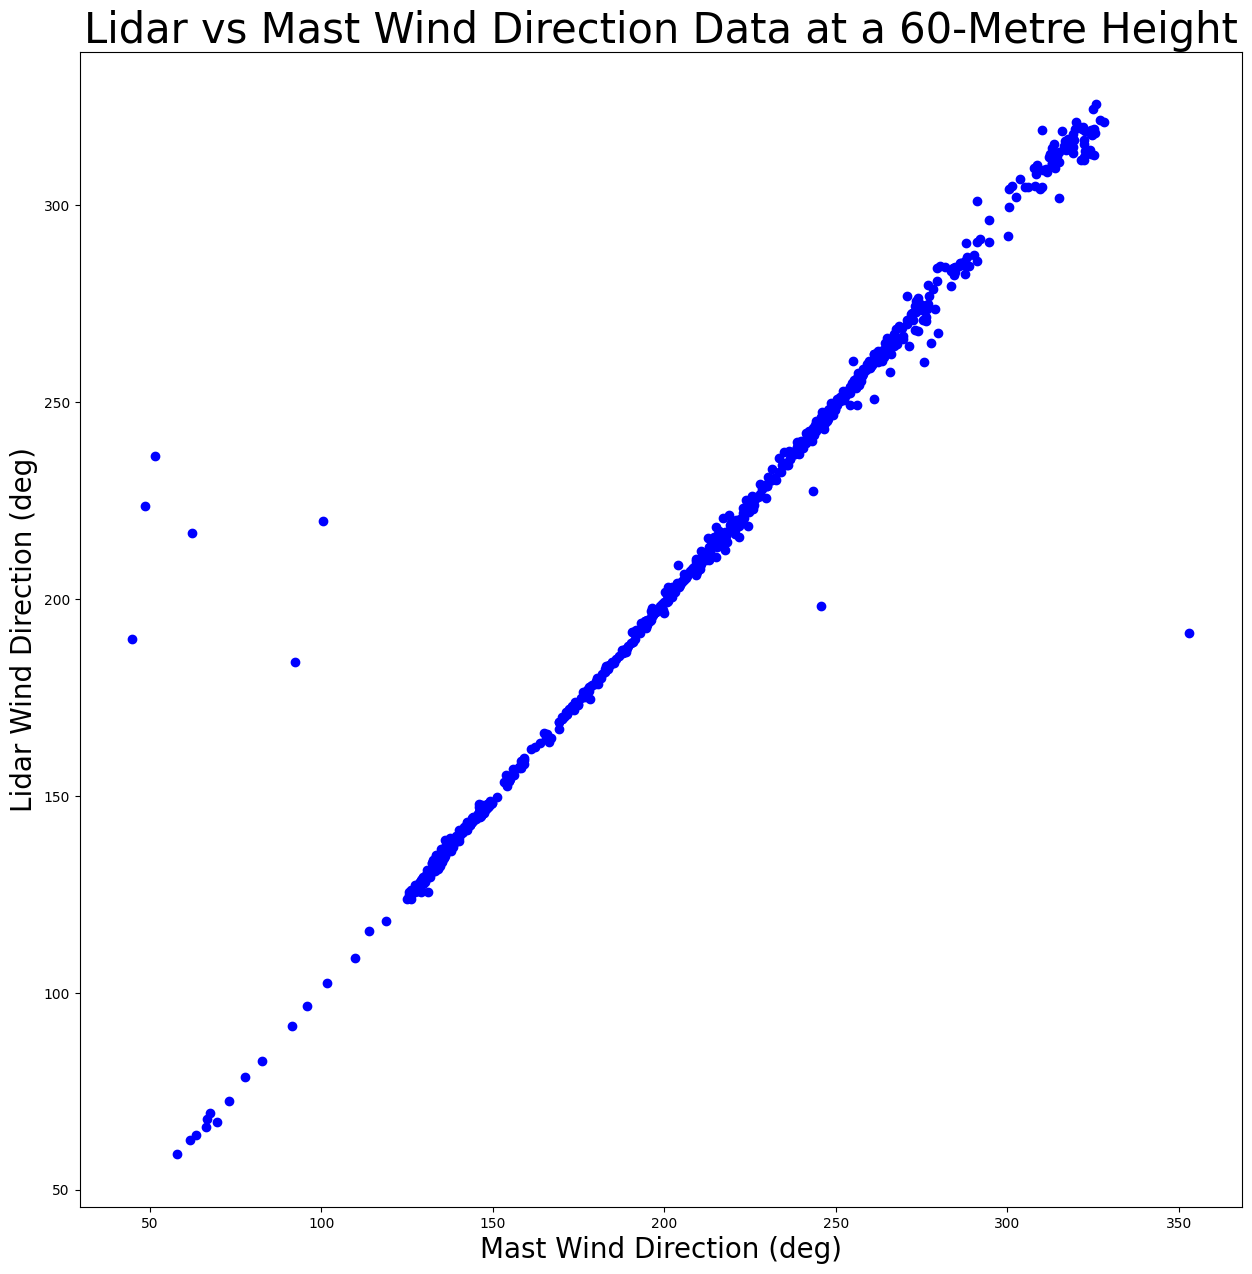

In [12]:
plot(mast, lidar, "Direction at 60m", "Wind Direction (deg)", "Lidar vs Mast Wind Direction Data at a 60-Metre Height", "Mast Wind Direction (deg)", "Lidar Wind Direction (deg)")

In [13]:
def lin_reg(dataset_x, dataset_y, variable_header_x, variable_header_y, dataset_early_start, dataset_late_start, dataset_early_finish, dataset_late_finish):
  from sklearn import linear_model

  if dataset_early_start is dataset_x:
    if dataset_early_finish is dataset_x:
      X = np.array(dataset_x[variable_header_x][start_index_from_late_start_ds :])
      Y = np.array(dataset_y[variable_header_y][: finish_index_from_early_finish_ds + 1])
    else:
      X = np.array(dataset_x[variable_header_x][start_index_from_late_start_ds : finish_index_from_early_finish_ds + 1])
      Y = np.array(dataset_y[variable_header_y])
  else:
    if dataset_late_finish is dataset_x:
      X = np.array(dataset_x[variable_header_x][: finish_index_from_early_finish_ds + 1])
      Y = np.array(dataset_y[variable_header_y][start_index_from_late_start_ds :])
    else:
      X = np.array(dataset_x[variable_header_x])
      Y = np.array(dataset_y[variable_header_y][start_index_from_late_start_ds : finish_index_from_early_finish_ds + 1])

  X = X.reshape(-1, 1)

  lm = linear_model.LinearRegression(fit_intercept = False)
  model = lm.fit(X,Y)

  prediction = lm.predict(X)

  r_sq = model.score(X,Y)
  print(f"coefficient of determination: {r_sq}")

  print(f"intercept: {model.intercept_}")

  print(f"slope: {model.coef_}")

dataset_x = mast
dataset_y = lidar
variable_header_x = "Direction at 60m"
variable_header_y = "Wind Direction (deg)"
dataset_early_start = mast = dataset_x
dataset_late_start = lidar = dataset_y
dataset_early_finish = lidar
dataset_late_finish = mast

lin_reg(dataset_x, dataset_y, variable_header_x, variable_header_y, dataset_early_start, dataset_late_start, dataset_early_finish, dataset_late_finish)

coefficient of determination: 0.9443242410158135
intercept: 0.0
slope: [0.99442026]


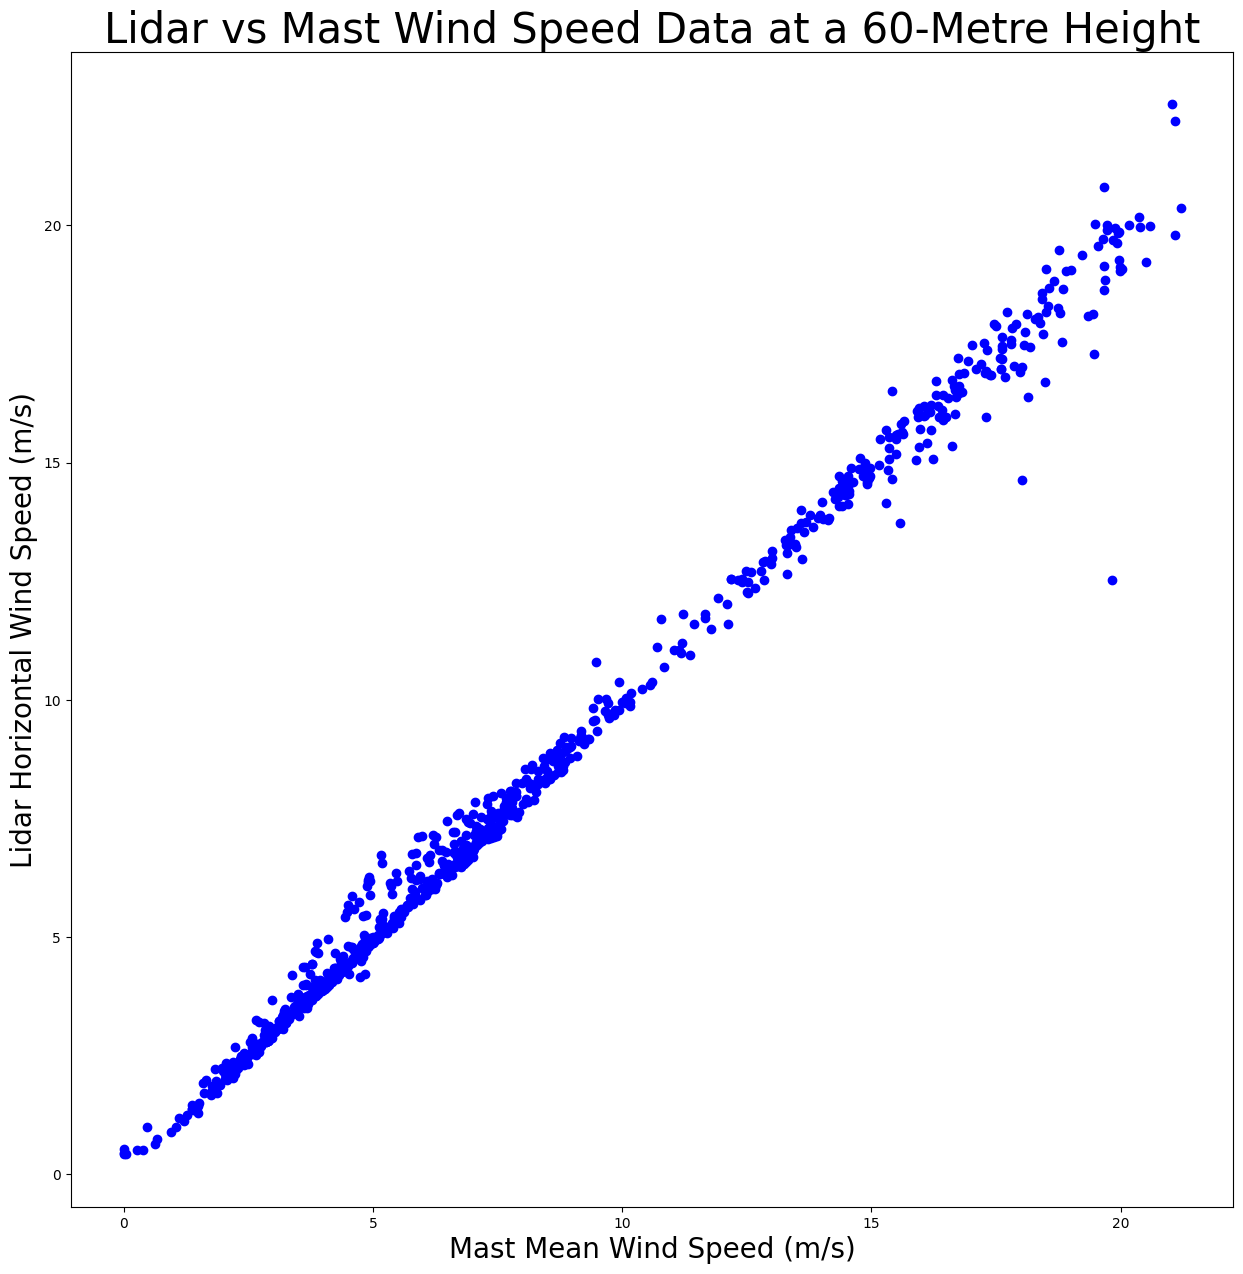

In [14]:
plot(mast, lidar, "Mean Wind Speed at 60m (m/s)", "Horizontal Wind Speed (m/s)", "Lidar vs Mast Wind Speed Data at a 60-Metre Height", "Mast Mean Wind Speed (m/s)", "Lidar Horizontal Wind Speed (m/s)")

In [15]:
dataset_x = mast
dataset_y = lidar
variable_header_x = "Mean Wind Speed at 60m (m/s)"
variable_header_y = "Horizontal Wind Speed (m/s)"
dataset_early_start = mast = dataset_x
dataset_late_start = lidar = dataset_y
dataset_early_finish = lidar
dataset_late_finish = mast

lin_reg(dataset_x, dataset_y, variable_header_x, variable_header_y, dataset_early_start, dataset_late_start, dataset_early_finish, dataset_late_finish)

coefficient of determination: 0.9919971797704566
intercept: 0.0
slope: [0.99182882]


In [16]:
#plot(mast, lidar, "Std Dev Wind Speed at 60m (m/s)", "Horizontal Wind Speed Std. Dev. (m/s)", "Lidar vs Mast Wind Speed Standard Deviation Data at a 60-Metre Height", "Mast Wind Speed Std. Dev. (m/s)", "Lidar Horizontal Wind Speed Std. Dev. (m/s)")

In [17]:
#dataset_x = mast
#dataset_y = lidar
#variable_header_x = "Std Dev Wind Speed at 60m (m/s)"
#variable_header_y = "Horizontal Wind Speed Std. Dev. (m/s)"
#dataset_early_start = mast = dataset_x
#dataset_late_start = lidar = dataset_y
#dataset_early_finish = lidar
#dataset_late_finish = mast

#lin_reg(dataset_x, dataset_y, variable_header_x, variable_header_y, dataset_early_start, dataset_late_start, dataset_early_finish, dataset_late_finish)

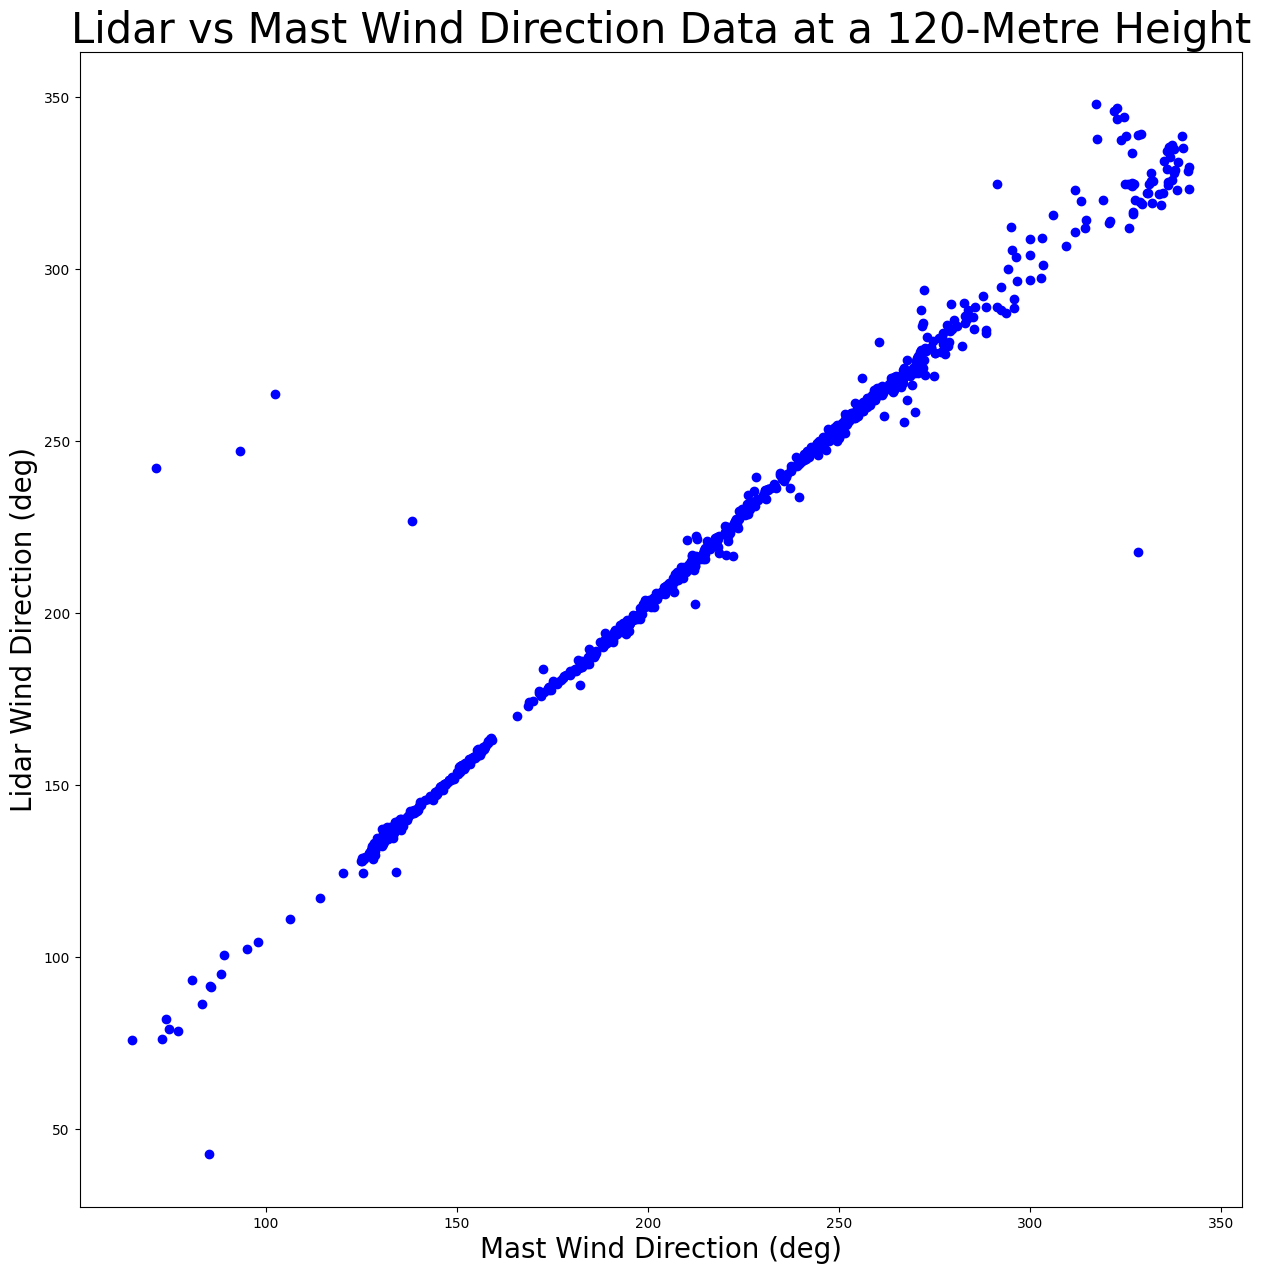

In [18]:
plot(mast, lidar, "Direction at 120m", "Wind Direction (deg).1", "Lidar vs Mast Wind Direction Data at a 120-Metre Height", "Mast Wind Direction (deg)", "Lidar Wind Direction (deg)")

In [19]:
dataset_x = mast
dataset_y = lidar
variable_header_x = "Direction at 120m"
variable_header_y = "Wind Direction (deg).1"
dataset_early_start = mast = dataset_x
dataset_late_start = lidar = dataset_y
dataset_early_finish = lidar
dataset_late_finish = mast

lin_reg(dataset_x, dataset_y, variable_header_x, variable_header_y, dataset_early_start, dataset_late_start, dataset_early_finish, dataset_late_finish)

coefficient of determination: 0.9610831811254776
intercept: 0.0
slope: [1.01239521]


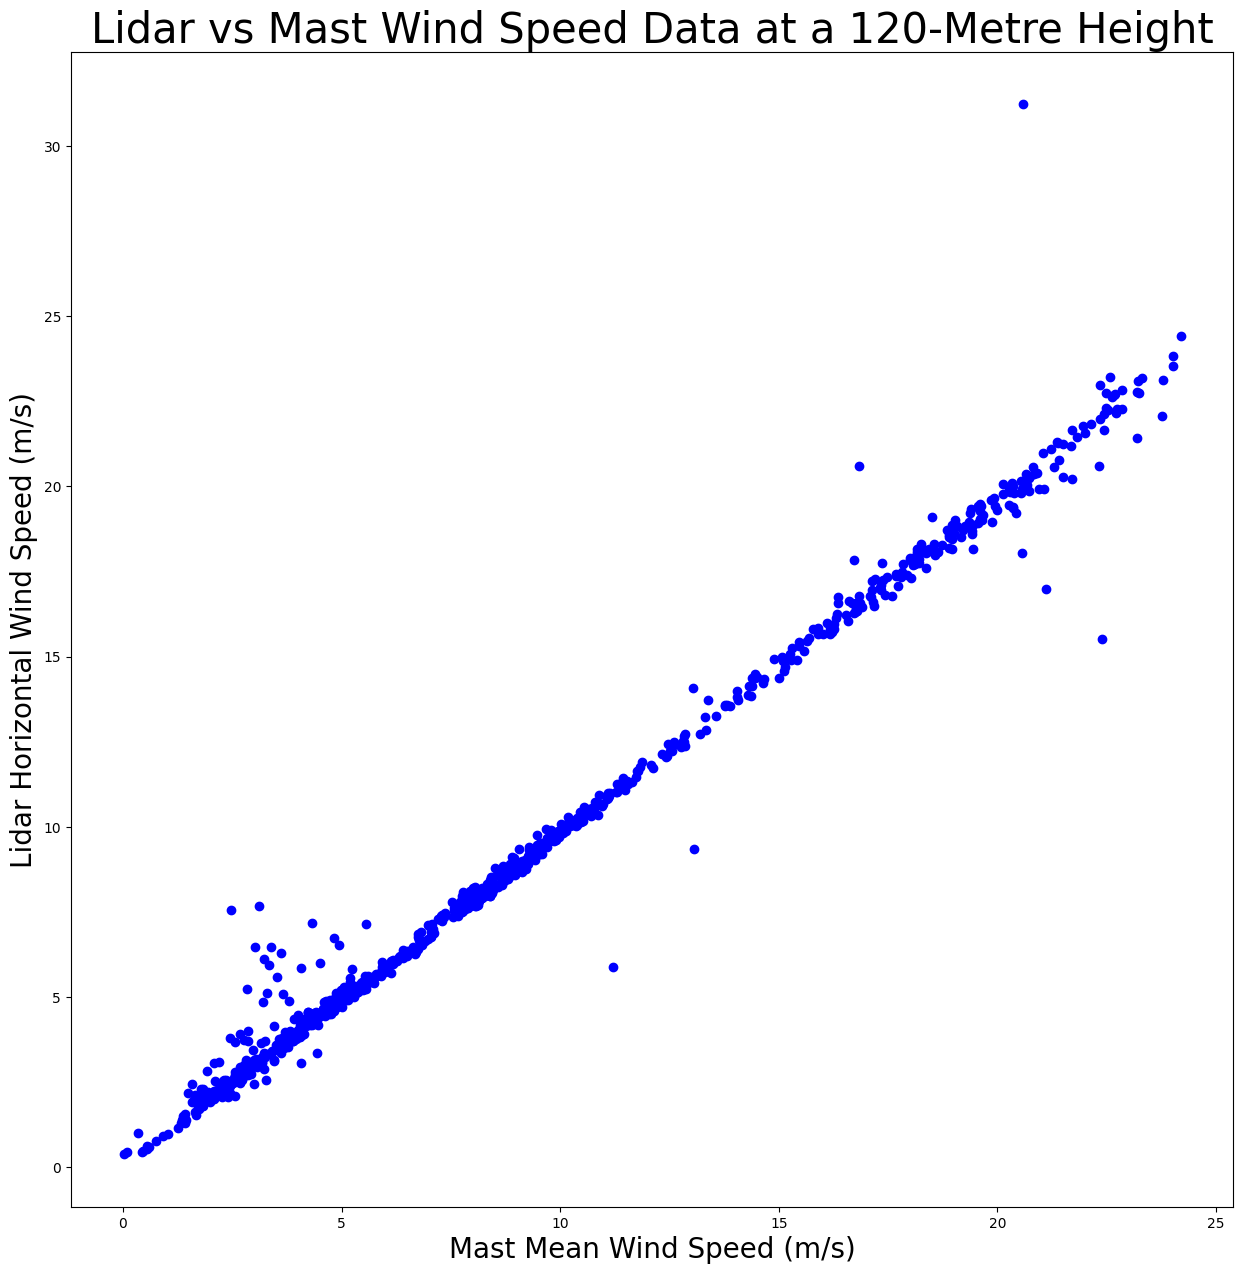

In [20]:
plot(mast, lidar, "Mean Wind Speed at 120m (m/s)", "Horizontal Wind Speed (m/s).1", "Lidar vs Mast Wind Speed Data at a 120-Metre Height", "Mast Mean Wind Speed (m/s)", "Lidar Horizontal Wind Speed (m/s)")

In [21]:
dataset_x = mast
dataset_y = lidar
variable_header_x = "Mean Wind Speed at 120m (m/s)"
variable_header_y = "Horizontal Wind Speed (m/s).1"
dataset_early_start = mast = dataset_x
dataset_late_start = lidar = dataset_y
dataset_early_finish = lidar
dataset_late_finish = mast

lin_reg(dataset_x, dataset_y, variable_header_x, variable_header_y, dataset_early_start, dataset_late_start, dataset_early_finish, dataset_late_finish)

coefficient of determination: 0.985998011572436
intercept: 0.0
slope: [0.9830517]


In [22]:
# plot(mast, lidar, "Std Dev Wind Speed at 120m (m/s)", "Horizontal Wind Speed Std. Dev. (m/s).1", "Lidar vs Mast Wind Speed Standard Deviation Data at a 120-Metre Height", "Mast Wind Speed Std. Dev. (m/s)", "Lidar Horizontal Wind Speed Std. Dev. (m/s)")

In [23]:
#dataset_x = mast
#dataset_y = lidar
#variable_header_x = "Std Dev Wind Speed at 120m (m/s)"
#variable_header_y = "Horizontal Wind Speed Std. Dev. (m/s).1"
#dataset_early_start = mast = dataset_x
#dataset_late_start = lidar = dataset_y
#dataset_early_finish = lidar
#dataset_late_finish = mast

#lin_reg(dataset_x, dataset_y, variable_header_x, variable_header_y, dataset_early_start, dataset_late_start, dataset_early_finish, dataset_late_finish)

In [24]:
def remove_errors(dataset, error_label, dataset2, dataset_early_start, dataset_late_finish, start_index_from_late_start_ds, finish_index_from_early_finish_ds):
  print("Indices of error codes in dataset before removal: {}".format(dataset.loc[dataset[error_label] > 0].index.values))
  print("Number of error codes in dataset before removal: {}".format(len(dataset.loc[dataset[error_label] > 0].index)))
  if dataset_early_start is dataset:
    if dataset_late_finish is dataset:
      dataset2.drop(dataset.loc[dataset[error_label] > 0].index + start_index_from_late_start_ds, inplace = True)
      dataset.drop(dataset.loc[dataset[error_label] > 0].index, inplace = True)
    else:
      dataset2.drop(dataset.loc[dataset[error_label][start_index_from_late_start_ds:] > 0].index - start_index_from_late_start_ds, inplace = True)
      dataset.drop(dataset.loc[dataset[error_label] > 0].index, inplace = True)
  else:
    if dataset_late_finish is dataset:
      dataset2.drop(dataset.loc[dataset[error_label][: finish_index_from_early_finish_ds + 1] > 0].index + start_index_from_late_start_ds, inplace = True)
      dataset.drop(dataset.loc[dataset[error_label] > 0].index, inplace = True)
    else:
      dataset2.drop(dataset.loc[dataset[error_label] > 0].index, inplace = True)
      dataset.drop(dataset.loc[dataset[error_label][start_index_from_late_start_ds : finish_index_from_early_finish_ds +1] > 0].index - start_index_from_late_start_ds, inplace = True)
  print("Number of error codes in dataset after removal: {}".format(len(dataset.loc[dataset[error_label] > 0].index)))
  return

dataset = lidar # dataset with error codes in
error_label = "Error Code"
dataset2 = mast # parallel dataset
dataset_early_start = mast
dataset_late_finish = lidar
start_index_from_late_start_ds = 150
finish_index_from_early_finish_ds = 1013

remove_errors(dataset, error_label, dataset2, dataset_early_start, dataset_late_finish, start_index_from_late_start_ds, finish_index_from_early_finish_ds)

Indices of error codes in dataset before removal: [  4   5   6 256 697 699 708 709]
Number of error codes in dataset before removal: 8
Number of error codes in dataset after removal: 0


In [25]:
print(len(mast.index))
print(len(lidar.index))

1006
856


In [26]:
def reset_ind(ds1, ds2):
  ds1.reset_index(drop = True, inplace = True)
  ds2.reset_index(drop = True, inplace = True)
  return

reset_ind(lidar, mast)

In [27]:
mast.head()

,Date and Time (UTC),Direction at 60m,Mean Wind Speed at 60m (m/s),Std Dev Wind Speed at 60m (m/s),Direction at 120m,Mean Wind Speed at 120m (m/s),Std Dev Wind Speed at 120m (m/s)
0,03/02/2030 23:00,327.933,8.199,1.390,326.667,7.471,1.510
1,03/02/2030 23:10,324.977,7.238,1.020,323.322,6.600,1.111
2,03/02/2030 23:20,323.660,6.831,0.896,322.047,7.212,1.243
3,03/02/2030 23:30,320.928,7.017,0.796,318.449,8.228,1.554
4,03/02/2030 23:40,315.518,7.521,0.844,311.230,9.687,0.910


In [28]:
lidar.head()

,Date and Time (UTC),Error Code,Horizontal Wind Speed (m/s),Horizontal Wind Speed Max (m/s),Horizontal Wind Speed Min (m/s),Horizontal Wind Speed Std. Dev. (m/s),Wind Direction (deg),Error Code.1,Horizontal Wind Speed (m/s).1,Horizontal Wind Speed Max (m/s).1,Horizontal Wind Speed Min (m/s).1,Horizontal Wind Speed Std. Dev. (m/s).1,Wind Direction (deg).1
0,05/02/2030 00:00,0.0,6.025,6.721,4.699,0.626,319.4,0.0,6.004,6.955,5.215,0.613,324.7
1,05/02/2030 00:10,0.0,5.893,6.971,4.802,0.580,321.7,0.0,6.104,7.055,5.315,0.713,324.8
2,05/02/2030 00:20,0.0,5.902,7.262,4.602,0.822,319.4,9999.0,5.934,7.524,6.164,0.863,333.7
3,05/02/2030 00:30,0.0,5.376,7.231,3.436,0.863,321.0,9999.0,6.294,7.754,5.834,0.793,337.6
4,05/02/2030 01:10,0.0,4.356,6.171,1.982,1.106,319.3,9999.0,7.544,9.224,7.414,0.301,339.3


In [29]:
dataset_early_start = mast
dataset_late_start = lidar
late_start_dataset_start_time = "05/02/2030 00:00"
early_finish_dataset_finish_time = "10/02/2030 23:50"
early_start_dataset_time_header = "Date and Time (UTC)"
late_finish_dataset_time_header = "Date and Time (UTC)"
dataset_early_finish = lidar
dataset_late_finish = mast

plot_xy_match(dataset_early_start, dataset_late_start, early_start_dataset_time_header, late_finish_dataset_time_header, early_finish_dataset_finish_time, late_start_dataset_start_time, dataset_early_finish, dataset_late_finish)

(Index([150], dtype='int64'), Index([1005], dtype='int64'))

In [30]:
start_index_from_late_start_ds = 150
finish_index_from_early_finish_ds = 1005 #1013 with 60m errors

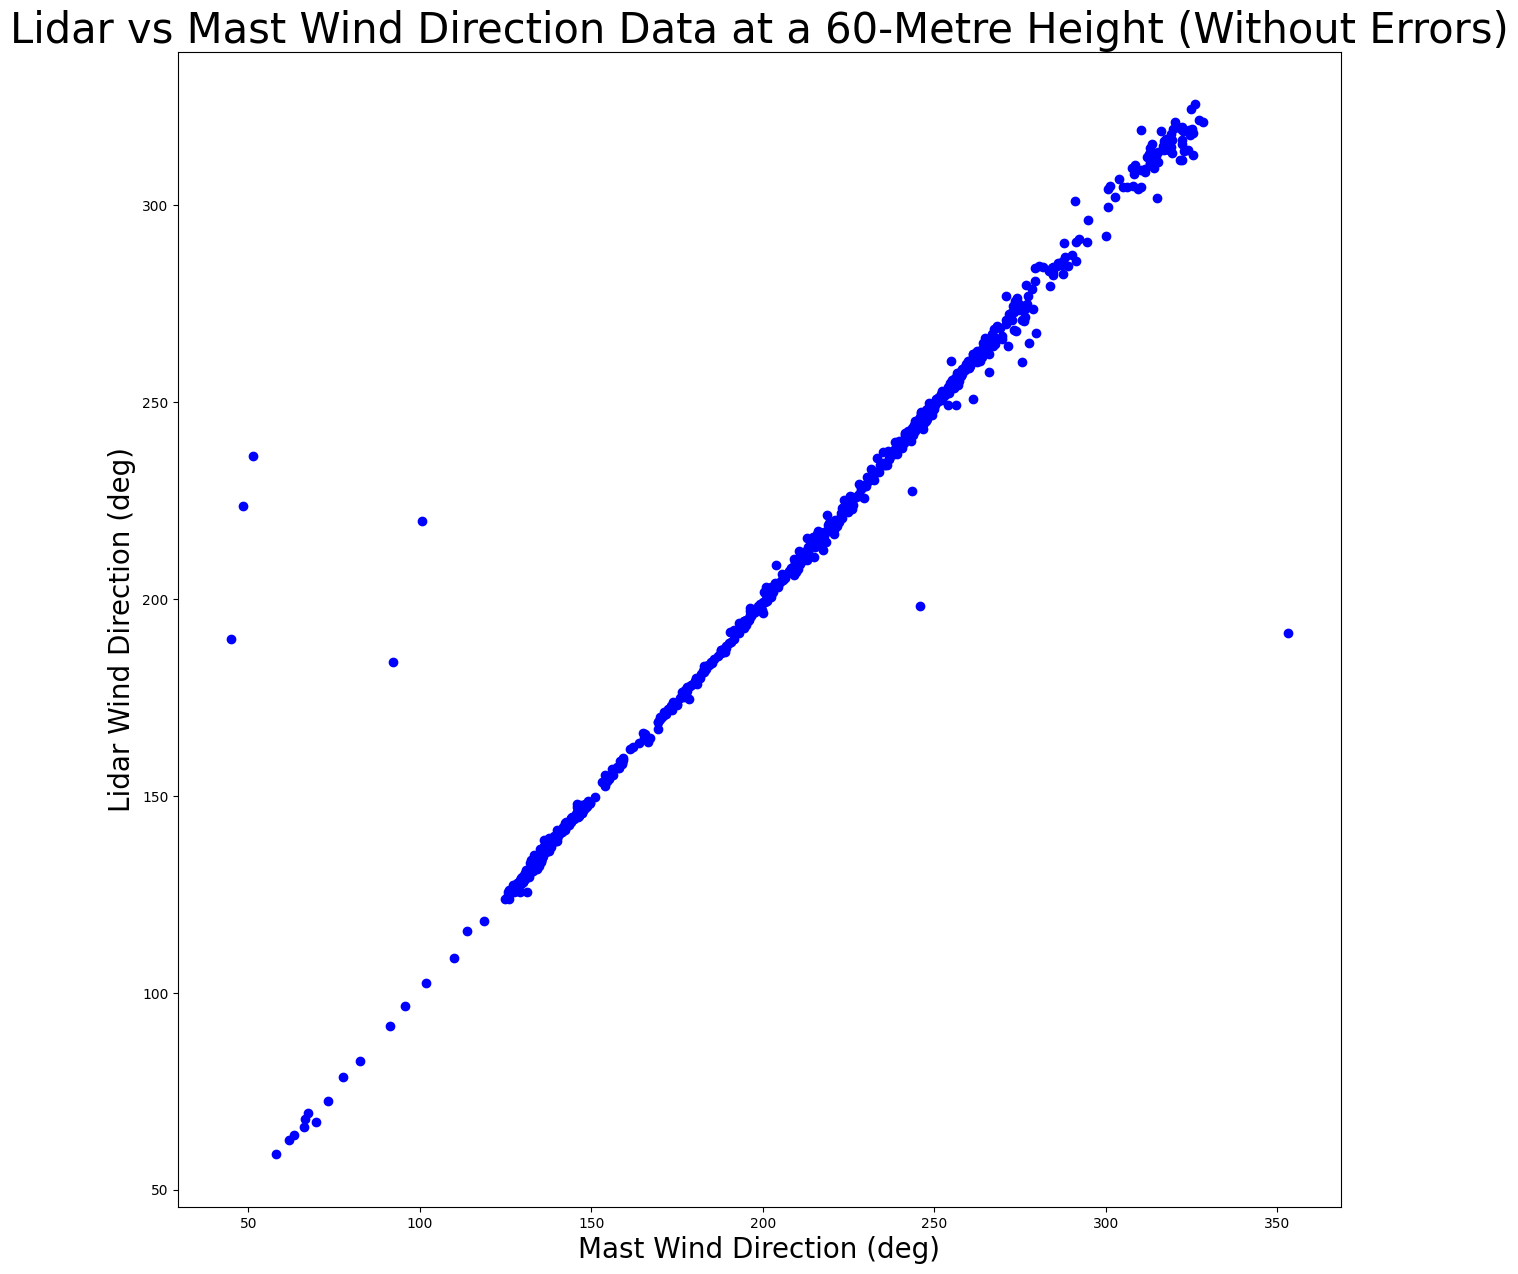

In [31]:
plot(mast, lidar, "Direction at 60m", "Wind Direction (deg)", "Lidar vs Mast Wind Direction Data at a 60-Metre Height (Without Errors)", "Mast Wind Direction (deg)", "Lidar Wind Direction (deg)")

In [32]:
dataset_x = mast
dataset_y = lidar
variable_header_x = "Direction at 60m"
variable_header_y = "Wind Direction (deg)"
dataset_early_start = mast = dataset_x
dataset_late_start = lidar = dataset_y
dataset_early_finish = lidar
dataset_late_finish = mast

lin_reg(dataset_x, dataset_y, variable_header_x, variable_header_y, dataset_early_start, dataset_late_start, dataset_early_finish, dataset_late_finish)

coefficient of determination: 0.951994318871962
intercept: 0.0
slope: [0.99437161]


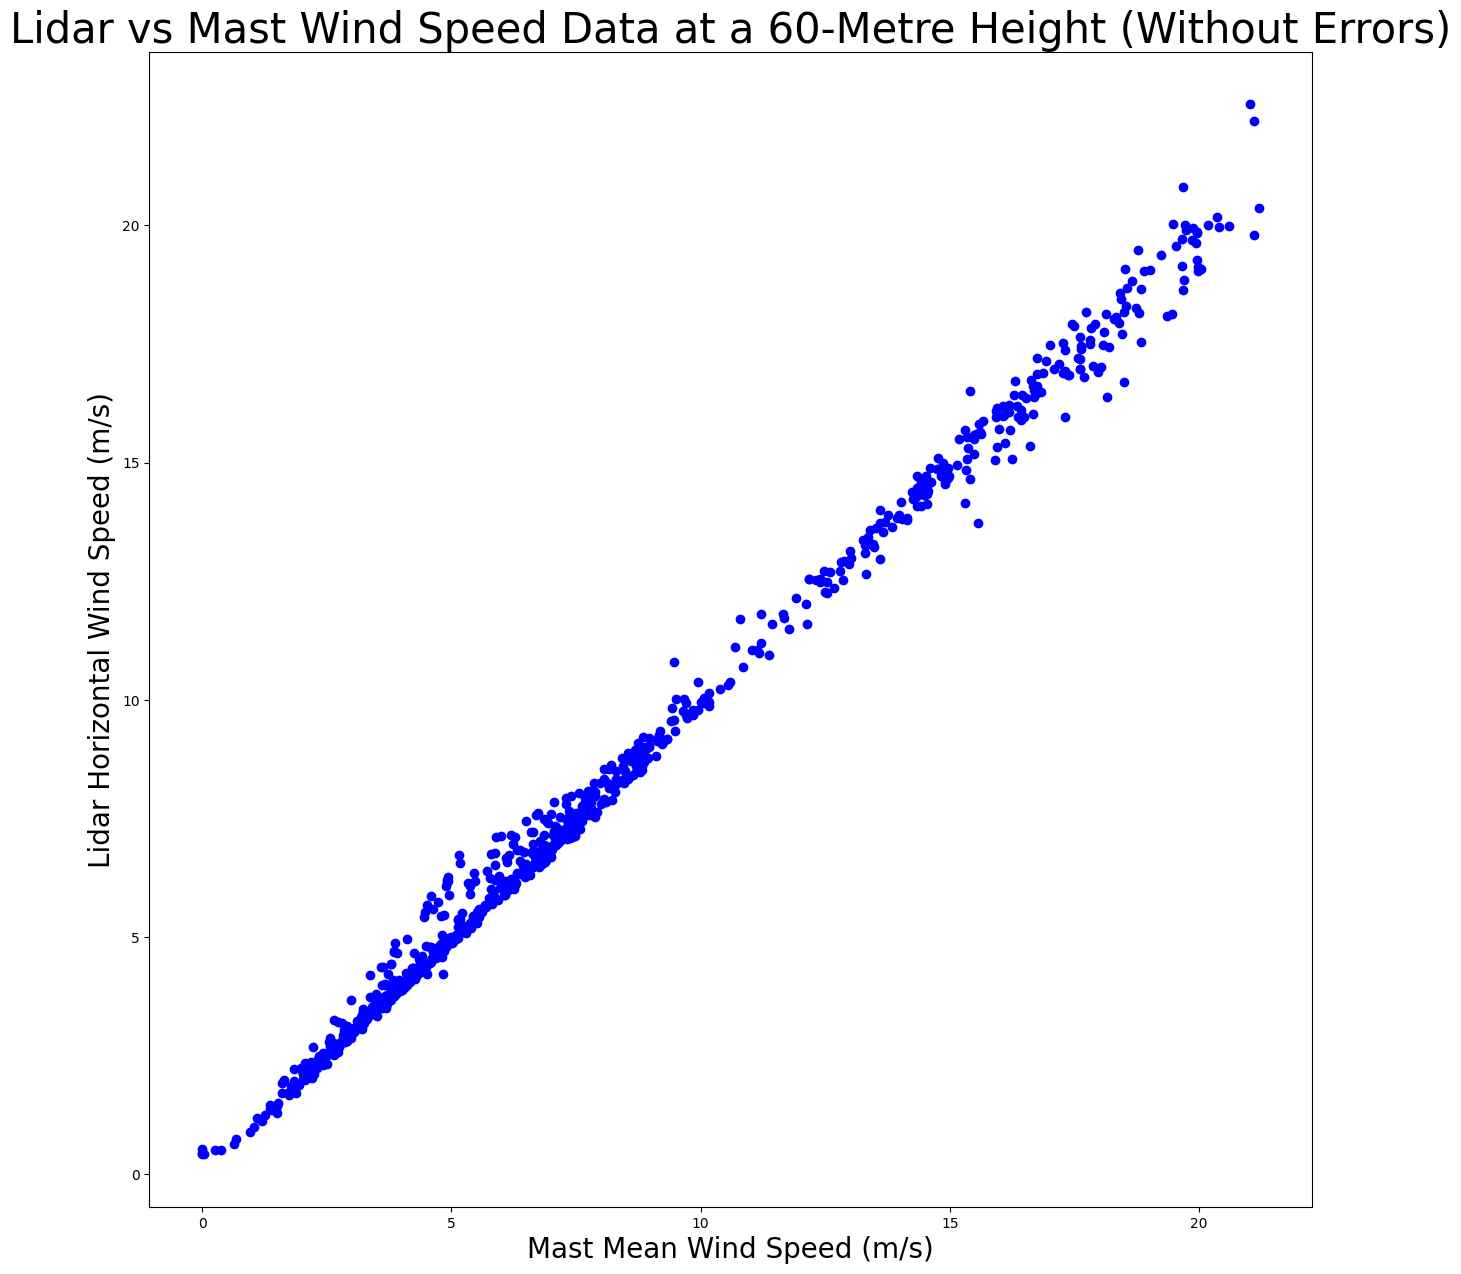

In [33]:
plot(mast, lidar, "Mean Wind Speed at 60m (m/s)", "Horizontal Wind Speed (m/s)", "Lidar vs Mast Wind Speed Data at a 60-Metre Height (Without Errors)", "Mast Mean Wind Speed (m/s)", "Lidar Horizontal Wind Speed (m/s)")

In [34]:
dataset_x = mast
dataset_y = lidar
variable_header_x = "Mean Wind Speed at 60m (m/s)"
variable_header_y = "Horizontal Wind Speed (m/s)"
dataset_early_start = mast = dataset_x
dataset_late_start = lidar = dataset_y
dataset_early_finish = lidar
dataset_late_finish = mast

lin_reg(dataset_x, dataset_y, variable_header_x, variable_header_y, dataset_early_start, dataset_late_start, dataset_early_finish, dataset_late_finish)

coefficient of determination: 0.9948282733149669
intercept: 0.0
slope: [0.99512268]


In [35]:
#plot(mast, lidar, "Std Dev Wind Speed at 60m (m/s)", "Horizontal Wind Speed Std. Dev. (m/s)", "Lidar vs Mast Wind Speed Standard Deviation Data at a 60-Metre Height", "Mast Wind Speed Std. Dev. (m/s)", "Lidar Horizontal Wind Speed Std. Dev. (m/s)")

In [36]:
#dataset_x = mast
#dataset_y = lidar
#variable_header_x =  "Std Dev Wind Speed at 60m (m/s)"
#variable_header_y = "Horizontal Wind Speed Std. Dev. (m/s)"
#dataset_early_start = mast = dataset_x
#dataset_late_start = lidar = dataset_y
#dataset_early_finish = lidar
#dataset_late_finish = mast

#lin_reg(dataset_x, dataset_y, variable_header_x, variable_header_y, dataset_early_start, dataset_late_start, dataset_early_finish, dataset_late_finish)

In [37]:
mast = pd.read_csv('/content/Mast.csv')
lidar = pd.read_csv('/content/Lidar.csv', header=1)

lidar = lidar.rename(columns={'Parameter': 'Date and Time (UTC)'})
lidar = lidar.drop(labels=0, axis=0)
lidar = lidar.reset_index().drop("index", axis = 1)

time_header_before = "Date and Time (UTC + 1)"
time_header_after = "Date and Time (UTC)"
hrs_diff = 1
dataset = mast

sync_time(dataset, time_header_before, time_header_after, hrs_diff)
lidar.head() # adding the 60m error codes back in by resetting the dataframe

,Date and Time (UTC),Error Code,Horizontal Wind Speed (m/s),Horizontal Wind Speed Max (m/s),Horizontal Wind Speed Min (m/s),Horizontal Wind Speed Std. Dev. (m/s),Wind Direction (deg),Error Code.1,Horizontal Wind Speed (m/s).1,Horizontal Wind Speed Max (m/s).1,Horizontal Wind Speed Min (m/s).1,Horizontal Wind Speed Std. Dev. (m/s).1,Wind Direction (deg).1
0,05/02/2030 00:00,0.0,6.025,6.721,4.699,0.626,319.4,0.0,6.004,6.955,5.215,0.613,324.7
1,05/02/2030 00:10,0.0,5.893,6.971,4.802,0.580,321.7,0.0,6.104,7.055,5.315,0.713,324.8
2,05/02/2030 00:20,0.0,5.902,7.262,4.602,0.822,319.4,9999.0,5.934,7.524,6.164,0.863,333.7
3,05/02/2030 00:30,0.0,5.376,7.231,3.436,0.863,321.0,9999.0,6.294,7.754,5.834,0.793,337.6
4,05/02/2030 00:40,9999.0,4.800,6.610,4.780,0.983,318.0,9999.0,6.454,7.654,5.774,0.649,338.7


In [38]:
lidar.head()

,Date and Time (UTC),Error Code,Horizontal Wind Speed (m/s),Horizontal Wind Speed Max (m/s),Horizontal Wind Speed Min (m/s),Horizontal Wind Speed Std. Dev. (m/s),Wind Direction (deg),Error Code.1,Horizontal Wind Speed (m/s).1,Horizontal Wind Speed Max (m/s).1,Horizontal Wind Speed Min (m/s).1,Horizontal Wind Speed Std. Dev. (m/s).1,Wind Direction (deg).1
0,05/02/2030 00:00,0.0,6.025,6.721,4.699,0.626,319.4,0.0,6.004,6.955,5.215,0.613,324.7
1,05/02/2030 00:10,0.0,5.893,6.971,4.802,0.580,321.7,0.0,6.104,7.055,5.315,0.713,324.8
2,05/02/2030 00:20,0.0,5.902,7.262,4.602,0.822,319.4,9999.0,5.934,7.524,6.164,0.863,333.7
3,05/02/2030 00:30,0.0,5.376,7.231,3.436,0.863,321.0,9999.0,6.294,7.754,5.834,0.793,337.6
4,05/02/2030 00:40,9999.0,4.800,6.610,4.780,0.983,318.0,9999.0,6.454,7.654,5.774,0.649,338.7


In [39]:
dataset = lidar # dataset with error codes in
error_label = "Error Code.1"
dataset2 = mast # parallel dataset
dataset_early_start = mast
dataset_late_finish = lidar
start_index_from_late_start_ds = 150
finish_index_from_early_finish_ds = 1013 #1005 without 60m errors

remove_errors(dataset, error_label, dataset2, dataset_early_start, dataset_late_finish, start_index_from_late_start_ds, finish_index_from_early_finish_ds)

Indices of error codes in dataset before removal: [  2   3   4   5   6   7   8   9  10  11  12 256 693 698 699 708 709 711
 856 857]
Number of error codes in dataset before removal: 20
Number of error codes in dataset after removal: 0


In [40]:
reset_ind(lidar, mast)

In [41]:
lidar.head()

,Date and Time (UTC),Error Code,Horizontal Wind Speed (m/s),Horizontal Wind Speed Max (m/s),Horizontal Wind Speed Min (m/s),Horizontal Wind Speed Std. Dev. (m/s),Wind Direction (deg),Error Code.1,Horizontal Wind Speed (m/s).1,Horizontal Wind Speed Max (m/s).1,Horizontal Wind Speed Min (m/s).1,Horizontal Wind Speed Std. Dev. (m/s).1,Wind Direction (deg).1
0,05/02/2030 00:00,0.0,6.025,6.721,4.699,0.626,319.4,0.0,6.004,6.955,5.215,0.613,324.7
1,05/02/2030 00:10,0.0,5.893,6.971,4.802,0.580,321.7,0.0,6.104,7.055,5.315,0.713,324.8
2,05/02/2030 02:10,0.0,4.846,6.161,3.857,0.621,318.1,0.0,4.849,6.610,2.938,1.188,325.0
3,05/02/2030 02:20,0.0,4.660,6.226,3.572,0.647,318.4,0.0,3.687,4.936,1.824,0.723,322.2
4,05/02/2030 02:30,0.0,5.183,6.438,4.040,0.532,316.1,0.0,5.116,6.534,4.003,0.689,319.7


In [42]:
dataset_early_start = mast
dataset_late_start = lidar
late_start_dataset_start_time = "05/02/2030 00:00"
early_finish_dataset_finish_time = "10/02/2030 23:50"
early_start_dataset_time_header = "Date and Time (UTC)"
late_finish_dataset_time_header = "Date and Time (UTC)"
dataset_early_finish = lidar
dataset_late_finish = mast

plot_xy_match(dataset_early_start, dataset_late_start, early_start_dataset_time_header, late_finish_dataset_time_header, early_finish_dataset_finish_time, late_start_dataset_start_time, dataset_early_finish, dataset_late_finish)

(Index([150], dtype='int64'), Index([993], dtype='int64'))

In [43]:
start_index_from_late_start_ds = 150
finish_index_from_early_finish_ds = 993 #1005 with 60m errors

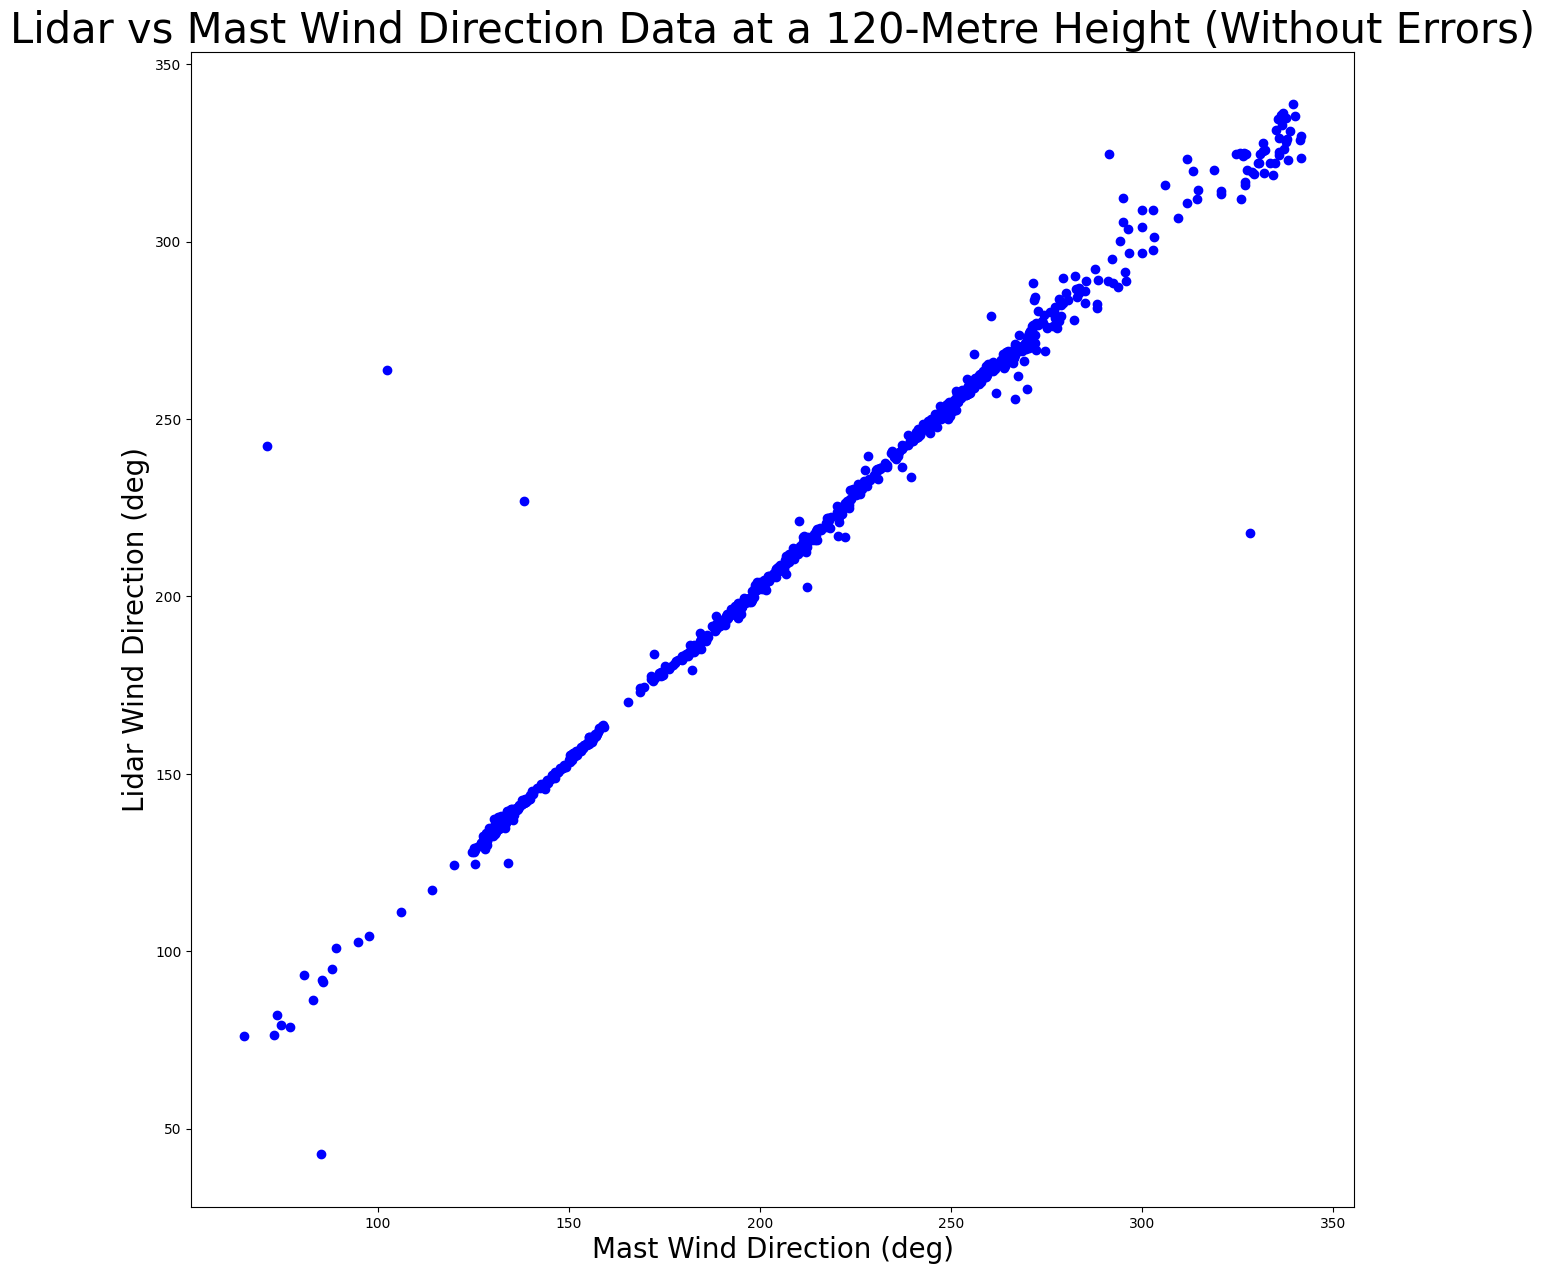

In [44]:
plot(mast, lidar, "Direction at 120m", "Wind Direction (deg).1", "Lidar vs Mast Wind Direction Data at a 120-Metre Height (Without Errors)", "Mast Wind Direction (deg)", "Lidar Wind Direction (deg)")

In [45]:
dataset_x = mast
dataset_y = lidar
variable_header_x =  "Direction at 120m"
variable_header_y = "Wind Direction (deg).1"
dataset_early_start = mast = dataset_x
dataset_late_start = lidar = dataset_y
dataset_early_finish = lidar
dataset_late_finish = mast

lin_reg(dataset_x, dataset_y, variable_header_x, variable_header_y, dataset_early_start, dataset_late_start, dataset_early_finish, dataset_late_finish)

coefficient of determination: 0.9678791876545124
intercept: 0.0
slope: [1.01061367]


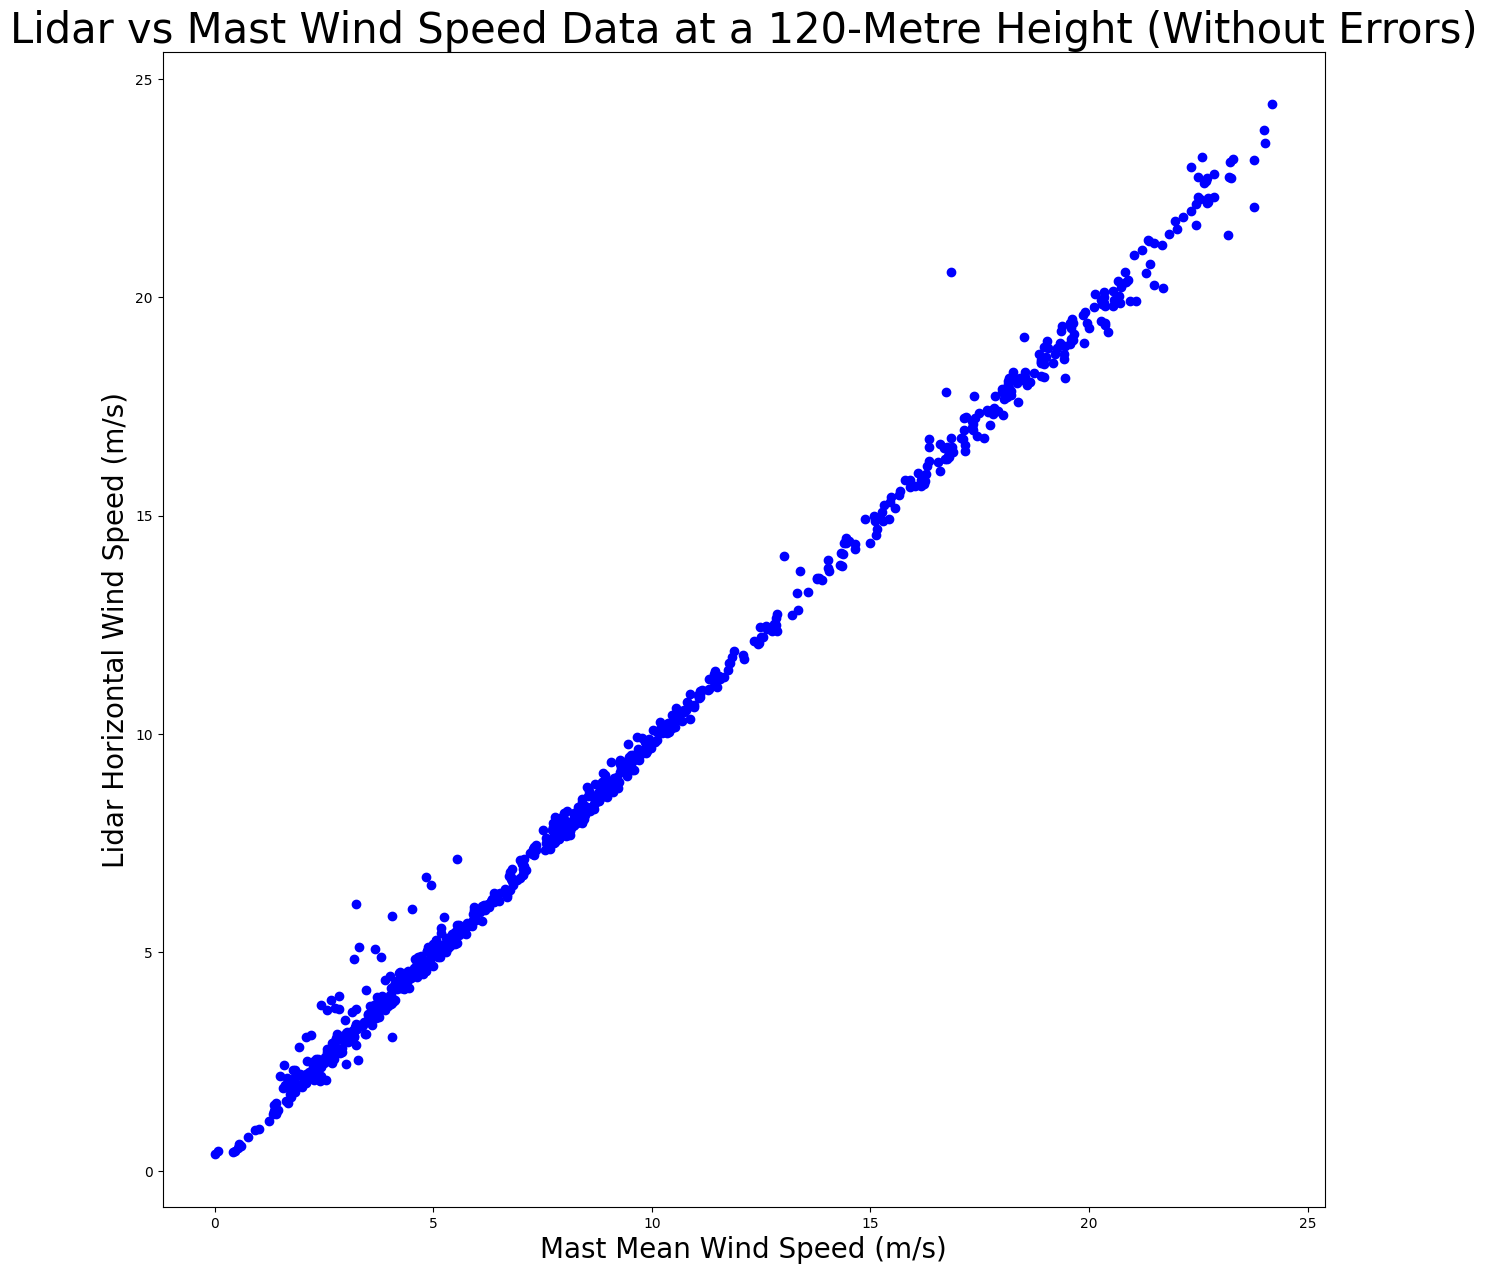

In [46]:
plot(mast, lidar, "Mean Wind Speed at 120m (m/s)", "Horizontal Wind Speed (m/s).1", "Lidar vs Mast Wind Speed Data at a 120-Metre Height (Without Errors)", "Mast Mean Wind Speed (m/s)", "Lidar Horizontal Wind Speed (m/s)")

In [47]:
dataset_x = mast
dataset_y = lidar
variable_header_x =  "Mean Wind Speed at 120m (m/s)"
variable_header_y = "Horizontal Wind Speed (m/s).1"
dataset_early_start = mast = dataset_x
dataset_late_start = lidar = dataset_y
dataset_early_finish = lidar
dataset_late_finish = mast

lin_reg(dataset_x, dataset_y, variable_header_x, variable_header_y, dataset_early_start, dataset_late_start, dataset_early_finish, dataset_late_finish)

coefficient of determination: 0.996350656941928
intercept: 0.0
slope: [0.9837887]


In [48]:
#plot(mast, lidar, "Std Dev Wind Speed at 120m (m/s)", "Horizontal Wind Speed Std. Dev. (m/s).1", "Lidar vs Mast Wind Speed Standard Deviation Data at a 120-Metre Height", "Mast Wind Speed Std. Dev. (m/s)", "Lidar Horizontal Wind Speed Std. Dev. (m/s)")

In [49]:
#dataset_x = mast
#dataset_y = lidar
#variable_header_x = "Std Dev Wind Speed at 120m (m/s)"
#variable_header_y = "Horizontal Wind Speed Std. Dev. (m/s).1"
#dataset_early_start = mast = dataset_x
#dataset_late_start = lidar = dataset_y
#dataset_early_finish = lidar
#dataset_late_finish = mast

#lin_reg(dataset_x, dataset_y, variable_header_x, variable_header_y, dataset_early_start, dataset_late_start, dataset_early_finish, dataset_late_finish)

In [50]:
mast = pd.read_csv('/content/Mast.csv')
lidar = pd.read_csv('/content/Lidar.csv', header=1)

lidar = lidar.rename(columns={'Parameter': 'Date and Time (UTC)'})
lidar = lidar.drop(labels=0, axis=0)
lidar = lidar.reset_index().drop("index", axis = 1)

time_header_before = "Date and Time (UTC + 1)"
time_header_after = "Date and Time (UTC)"
hrs_diff = 1
dataset = mast

sync_time(dataset, time_header_before, time_header_after, hrs_diff)
lidar.head() # adding the 120m error codes back in by resetting the dataframe

,Date and Time (UTC),Error Code,Horizontal Wind Speed (m/s),Horizontal Wind Speed Max (m/s),Horizontal Wind Speed Min (m/s),Horizontal Wind Speed Std. Dev. (m/s),Wind Direction (deg),Error Code.1,Horizontal Wind Speed (m/s).1,Horizontal Wind Speed Max (m/s).1,Horizontal Wind Speed Min (m/s).1,Horizontal Wind Speed Std. Dev. (m/s).1,Wind Direction (deg).1
0,05/02/2030 00:00,0.0,6.025,6.721,4.699,0.626,319.4,0.0,6.004,6.955,5.215,0.613,324.7
1,05/02/2030 00:10,0.0,5.893,6.971,4.802,0.580,321.7,0.0,6.104,7.055,5.315,0.713,324.8
2,05/02/2030 00:20,0.0,5.902,7.262,4.602,0.822,319.4,9999.0,5.934,7.524,6.164,0.863,333.7
3,05/02/2030 00:30,0.0,5.376,7.231,3.436,0.863,321.0,9999.0,6.294,7.754,5.834,0.793,337.6
4,05/02/2030 00:40,9999.0,4.800,6.610,4.780,0.983,318.0,9999.0,6.454,7.654,5.774,0.649,338.7


In [51]:
corr = pd.read_csv('/content/Correction.csv')
corr.drop(index = 0, inplace = True)
corr.reset_index(drop = True, inplace = True)

In [52]:
def lidar_correct(direction_header, speed_header, dataset, height_index, c_dataset):
  for i in range(35):
    centre = 10*i + 10
    dataset.loc[(dataset[direction_header] < 10*i + 15) & (dataset[direction_header] >= 10*i + 5), speed_header] = dataset[speed_header] * c_dataset[str(centre)][height_index]
  dataset.loc[(dataset[direction_header] < 5) & (dataset[direction_header] >= 355), speed_header] = dataset[speed_header] * c_dataset["0"][height_index]
  return


direction_header = "Wind Direction (deg)"
speed_header = "Horizontal Wind Speed (m/s)"
dataset = lidar
c_dataset = corr
height_index = 0

lidar_correct(direction_header, speed_header, dataset, height_index, c_dataset)

In [53]:
#dataset = lidar # dataset with error codes in
#error_label = "Error Code"
#dataset2 = mast # parallel dataset
#dataset_early_start = mast
#dataset_late_finish = lidar
#start_index_from_late_start_ds = 150
#finish_index_from_early_finish_ds = 1013

#remove_errors(dataset, error_label, dataset2, dataset_early_start, dataset_late_finish, start_index_from_late_start_ds, finish_index_from_early_finish_ds)

In [54]:
#reset_ind(lidar, mast)

In [55]:
dataset_early_start = mast
dataset_late_start = lidar
late_start_dataset_start_time = "05/02/2030 00:00"
early_finish_dataset_finish_time = "10/02/2030 23:50"
early_start_dataset_time_header = "Date and Time (UTC)"
late_finish_dataset_time_header = "Date and Time (UTC)"
dataset_early_finish = lidar
dataset_late_finish = mast

plot_xy_match(dataset_early_start, dataset_late_start, early_start_dataset_time_header, late_finish_dataset_time_header, early_finish_dataset_finish_time, late_start_dataset_start_time, dataset_early_finish, dataset_late_finish)

(Index([150], dtype='int64'), Index([1013], dtype='int64'))

In [56]:
start_index_from_late_start_ds = 150
finish_index_from_early_finish_ds = 1013 #1005 without 60m errors

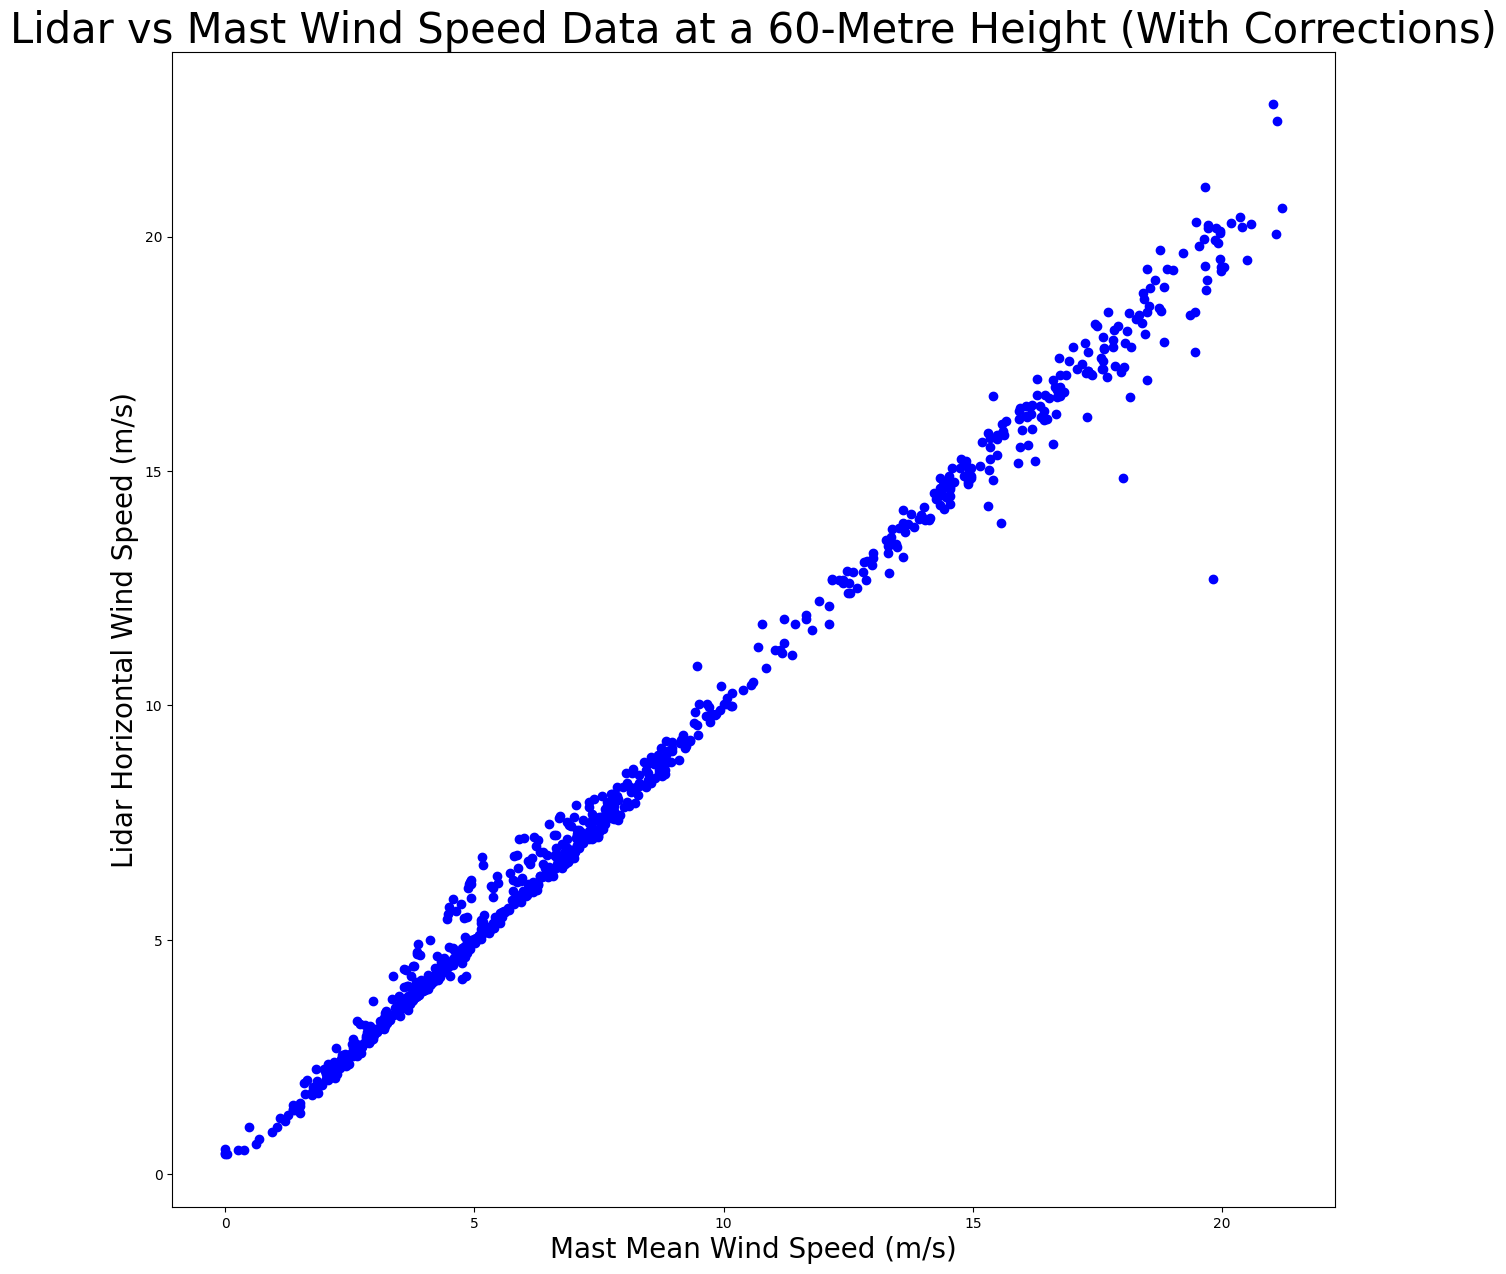

In [57]:
plot(mast, lidar, "Mean Wind Speed at 60m (m/s)", "Horizontal Wind Speed (m/s)", "Lidar vs Mast Wind Speed Data at a 60-Metre Height (With Corrections)", "Mast Mean Wind Speed (m/s)", "Lidar Horizontal Wind Speed (m/s)")

In [58]:
dataset_x = mast
dataset_y = lidar
variable_header_x = "Mean Wind Speed at 60m (m/s)"
variable_header_y = "Horizontal Wind Speed (m/s)"
dataset_early_start = mast = dataset_x
dataset_late_start = lidar = dataset_y
dataset_early_finish = lidar
dataset_late_finish = mast

lin_reg(dataset_x, dataset_y, variable_header_x, variable_header_y, dataset_early_start, dataset_late_start, dataset_early_finish, dataset_late_finish)

coefficient of determination: 0.9924339139879802
intercept: 0.0
slope: [1.00190158]


In [59]:
mast = pd.read_csv('/content/Mast.csv')
lidar = pd.read_csv('/content/Lidar.csv', header=1)

lidar = lidar.rename(columns={'Parameter': 'Date and Time (UTC)'})
lidar = lidar.drop(labels=0, axis=0)
lidar = lidar.reset_index().drop("index", axis = 1)

time_header_before = "Date and Time (UTC + 1)"
time_header_after = "Date and Time (UTC)"
hrs_diff = 1
dataset = mast

sync_time(dataset, time_header_before, time_header_after, hrs_diff)
lidar.head() # adding the 60m error codes back in by resetting the dataframe

,Date and Time (UTC),Error Code,Horizontal Wind Speed (m/s),Horizontal Wind Speed Max (m/s),Horizontal Wind Speed Min (m/s),Horizontal Wind Speed Std. Dev. (m/s),Wind Direction (deg),Error Code.1,Horizontal Wind Speed (m/s).1,Horizontal Wind Speed Max (m/s).1,Horizontal Wind Speed Min (m/s).1,Horizontal Wind Speed Std. Dev. (m/s).1,Wind Direction (deg).1
0,05/02/2030 00:00,0.0,6.025,6.721,4.699,0.626,319.4,0.0,6.004,6.955,5.215,0.613,324.7
1,05/02/2030 00:10,0.0,5.893,6.971,4.802,0.580,321.7,0.0,6.104,7.055,5.315,0.713,324.8
2,05/02/2030 00:20,0.0,5.902,7.262,4.602,0.822,319.4,9999.0,5.934,7.524,6.164,0.863,333.7
3,05/02/2030 00:30,0.0,5.376,7.231,3.436,0.863,321.0,9999.0,6.294,7.754,5.834,0.793,337.6
4,05/02/2030 00:40,9999.0,4.800,6.610,4.780,0.983,318.0,9999.0,6.454,7.654,5.774,0.649,338.7


In [60]:
direction_header = "Wind Direction (deg).1"
speed_header = "Horizontal Wind Speed (m/s).1"
dataset = lidar
c_dataset = corr
height_index = 1

lidar_correct(direction_header, speed_header, dataset, height_index, c_dataset)

In [61]:
#dataset = lidar # dataset with error codes in
#error_label = "Error Code.1"
#dataset2 = mast # parallel dataset
#dataset_early_start = mast
#dataset_late_finish = lidar
#start_index_from_late_start_ds = 150
#finish_index_from_early_finish_ds = 1013 #1005 without 60m errors

#remove_errors(dataset, error_label, dataset2, dataset_early_start, dataset_late_finish, start_index_from_late_start_ds, finish_index_from_early_finish_ds)

In [62]:
#reset_ind(lidar, mast)

In [63]:
dataset_early_start = mast
dataset_late_start = lidar
late_start_dataset_start_time = "05/02/2030 00:00"
early_finish_dataset_finish_time = "10/02/2030 23:50"
early_start_dataset_time_header = "Date and Time (UTC)"
late_finish_dataset_time_header = "Date and Time (UTC)"
dataset_early_finish = lidar
dataset_late_finish = mast

plot_xy_match(dataset_early_start, dataset_late_start, early_start_dataset_time_header, late_finish_dataset_time_header, early_finish_dataset_finish_time, late_start_dataset_start_time, dataset_early_finish, dataset_late_finish)

(Index([150], dtype='int64'), Index([1013], dtype='int64'))

In [64]:
start_index_from_late_start_ds = 150
finish_index_from_early_finish_ds = 1013 #993 without 120m errors

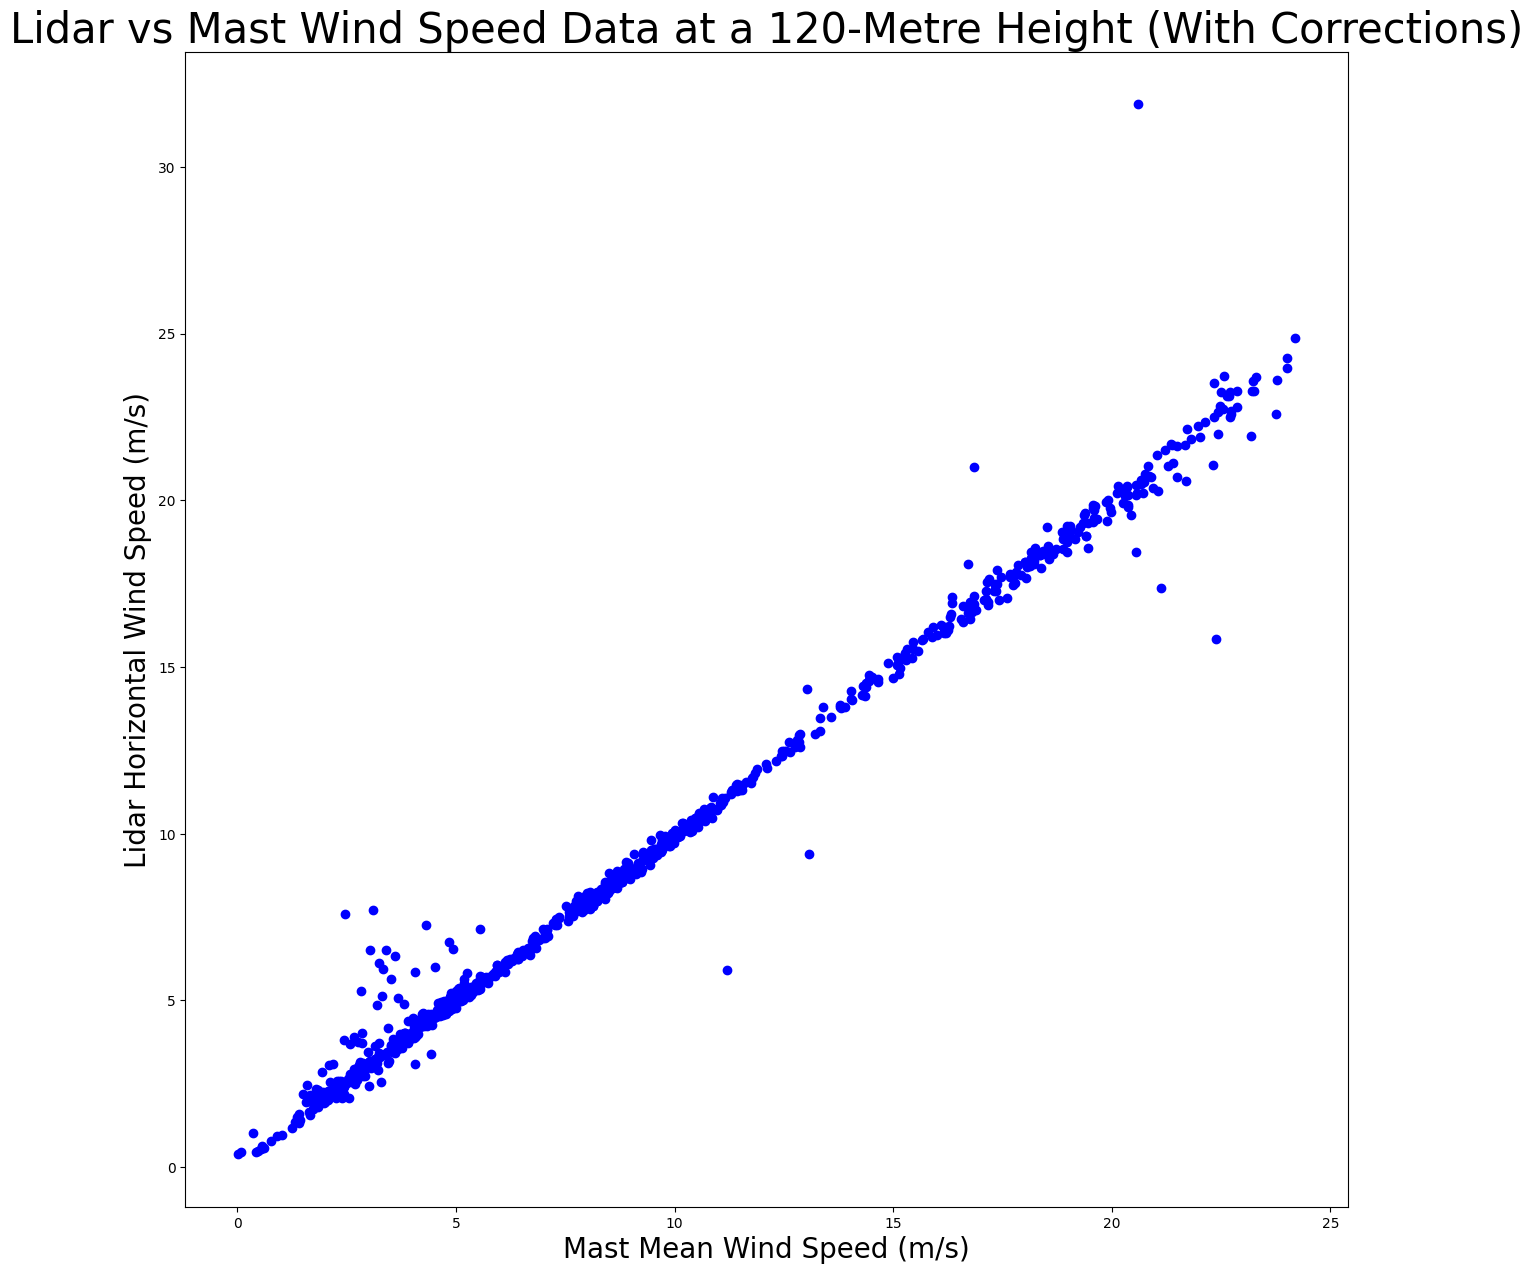

In [65]:
plot(mast, lidar, "Mean Wind Speed at 120m (m/s)", "Horizontal Wind Speed (m/s).1", "Lidar vs Mast Wind Speed Data at a 120-Metre Height (With Corrections)", "Mast Mean Wind Speed (m/s)", "Lidar Horizontal Wind Speed (m/s)")

In [66]:
dataset_x = mast
dataset_y = lidar
variable_header_x = "Mean Wind Speed at 120m (m/s)"
variable_header_y = "Horizontal Wind Speed (m/s).1"
dataset_early_start = mast = dataset_x
dataset_late_start = lidar = dataset_y
dataset_early_finish = lidar
dataset_late_finish = mast

lin_reg(dataset_x, dataset_y, variable_header_x, variable_header_y, dataset_early_start, dataset_late_start, dataset_early_finish, dataset_late_finish)

coefficient of determination: 0.986322457820383
intercept: 0.0
slope: [0.9992389]
